<a href="https://colab.research.google.com/github/AagamChhajer/Python/blob/main/Cat_vs_Dog_Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2023-08-29 19:57:23--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2023-08-29 19:57:23--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7be74b1a20b4cef128782ed2eb.dl.dropboxusercontent.com/cd/0/inline/CCt8MGjiOZwO2aBABYTA1IER7-q_h6C7eN5pOiVuMnSej3y0AhOQI8Q-mecpp9ULjUKwhlvWEUolf1E2M51MYyuBd81V-AhoPatZzfVxaV6R8OfFezjMi5sfpetqOq0pFLfITPZGX8qC1oP47KOGbJd2/file# [following]
--2023-08-29 19:57:24--  https://uc7be74b1a20b4cef128782ed2eb.dl.dropboxusercontent.com/cd/0/inline/CCt8MGjiOZwO2aBABYTA1IER7-q_h6C7eN5pOiVuMnSej3y0AhOQI8Q-mecpp9ULjUKwhlvWEUolf1E2M51MYyuBd8

In [2]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


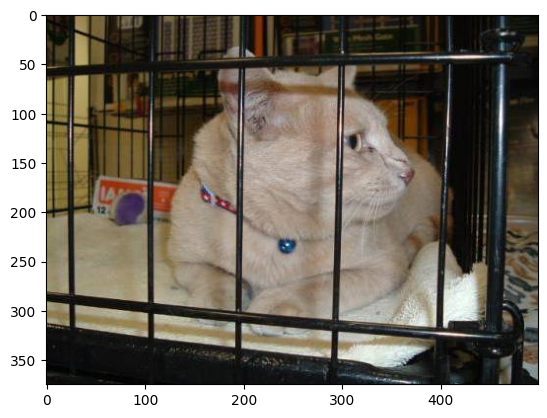

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img = npimg.imread('/content/test_set/test_set/cats/cat.4008.jpg')
imgplot = plt.imshow(img)
plt.show()

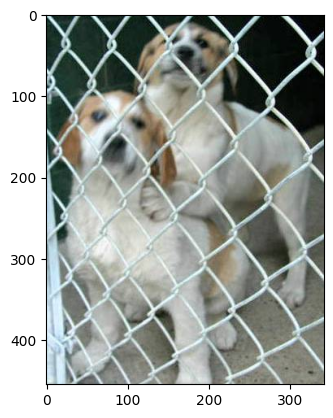

In [7]:
img = npimg.imread('/content/test_set/test_set/dogs/dog.4008.jpg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as npimg
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation


In [18]:
print(tensorflow.__version__)

2.12.0


In [19]:
img_width,img_height = 150,150
train_dir = r"/content/training_set/training_set"
test_dir = r"/content/test_set/test_set"
nb_train_sample = 100
nb_validation_samples = 100
epochs = 20
batch_size = 20

In [20]:
import tensorflow.keras.backend as k
if k.image_data_format() == 'channels_first':
  input_shape= (3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [21]:
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size = (img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
validation_generator = test_datagen.flow_from_directory(test_dir,target_size = (img_width,img_height),batch_size=batch_size,class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


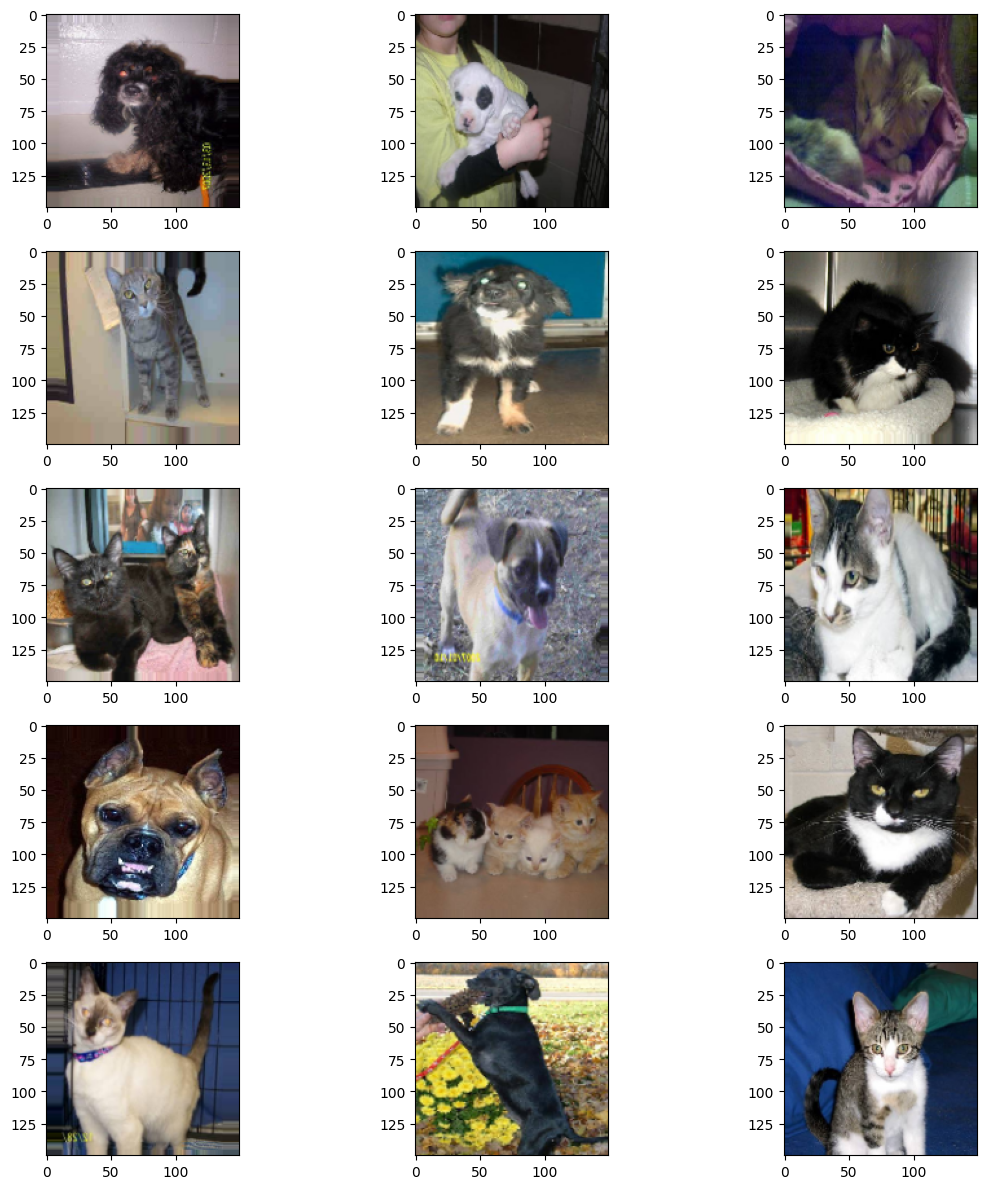

In [22]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for x_batch,y_batch in train_generator:
    image = x_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [25]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))#64 neurons with 3x3 filter
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#reduces size of data
model.add(Flatten())#convert multi dimensional to 1D array
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_2 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                      

In [26]:
model.compile(optimizer='rmsprop',loss = 'binary_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_2 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                      

In [27]:
training = model.fit(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)


Epoch 1/20
100/100 [==============================] - 94s 924ms/step - loss: 2.0033 - accuracy: 0.5270 - val_loss: 0.6731 - val_accuracy: 0.5400
Epoch 2/20
100/100 [==============================] - 92s 920ms/step - loss: 0.6976 - accuracy: 0.5590 - val_loss: 0.6533 - val_accuracy: 0.6320
Epoch 3/20
100/100 [==============================] - 91s 910ms/step - loss: 0.6661 - accuracy: 0.5950 - val_loss: 0.6391 - val_accuracy: 0.6275
Epoch 4/20
100/100 [==============================] - 97s 969ms/step - loss: 0.6591 - accuracy: 0.6200 - val_loss: 0.6254 - val_accuracy: 0.6395
Epoch 5/20
100/100 [==============================] - 93s 932ms/step - loss: 0.6454 - accuracy: 0.6368 - val_loss: 0.6359 - val_accuracy: 0.6075
Epoch 6/20
100/100 [==============================] - 94s 946ms/step - loss: 0.6177 - accuracy: 0.6555 - val_loss: 0.6113 - val_accuracy: 0.6785
Epoch 7/20
100/100 [==============================] - 94s 945ms/step - loss: 0.6203 - accuracy: 0.6430 - val_loss: 0.6015 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


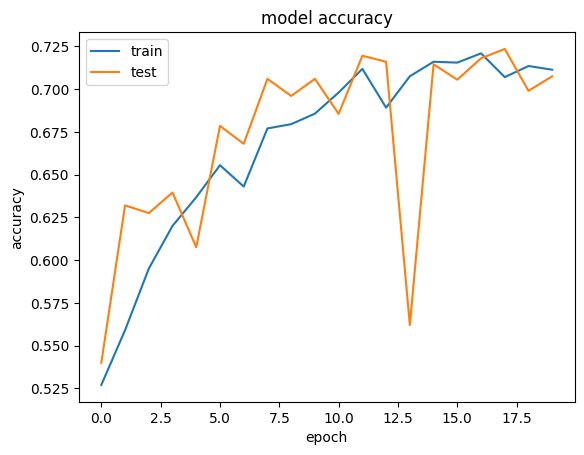

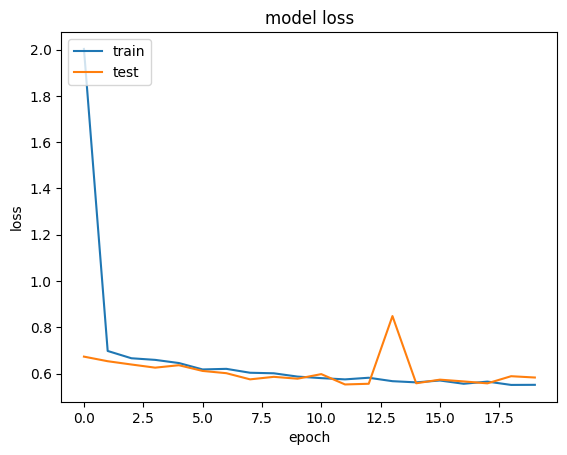

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

IMAGE PREDICTION


1/1 [==============================] - 0s 174ms/step
[[1.]]
Prediction: cat


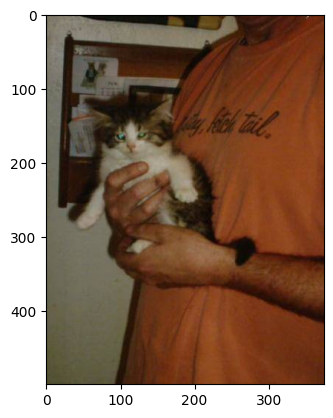

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/content/test_set/test_set/cats/cat.4002.jpg",target_size=(150,150))
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred,axis=0)

result = model.predict(img_pred)
print(result)
if result[0][0] == 0:
  prediction = "Dog"
else:
  prediction = "cat"
print("Prediction:",prediction)

img = npimg.imread('/content/test_set/test_set/cats/cat.4002.jpg')
imgplot = plt.imshow(img)
plt.show()

